In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp
%matplotlib inline

df = pd.read_csv("pengeluaran.csv")
df

,id_pengeluaran,id_user,kategori,jumlah,tanggal
0,1,1,Makanan dan Minuman,10000,1/4/2024
1,2,1,Makanan dan Minuman,12000,1/4/2024
2,3,1,Paket Internet,50000,1/4/2024
3,4,1,Kos,500000,1/4/2024
4,5,1,Makanan dan Minuman,15000,2/4/2024
...,...,...,...,...,...
624,625,1,Makanan dan Minuman,10000,28/4/2025
625,626,1,Lainnya,17000,28/4/2025
626,627,1,Makanan dan Minuman,12000,29/4/2025
627,628,1,Transportasi,8000,29/4/2025


In [38]:
profile = pp.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 92.89it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
df['kategori'].value_counts()

kategori
Makanan dan Minuman    458
Lainnya                 71
Transportasi            48
Kebutuhan Akademik      21
Paket Internet          13
Kos                     13
Kesehatan                5
Name: count, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_pengeluaran  629 non-null    int64 
 1   id_user         629 non-null    int64 
 2   kategori        629 non-null    object
 3   jumlah          629 non-null    int64 
 4   tanggal         629 non-null    object
dtypes: int64(3), object(2)
memory usage: 24.7+ KB


In [41]:
df.describe()

,id_pengeluaran,id_user,jumlah
count,629.00000,629.0,629.000000
mean,315.00000,1.0,25912.559618
std,181.72094,0.0,69370.671848
min,1.00000,1.0,5000.000000
25%,158.00000,1.0,11000.000000
50%,315.00000,1.0,15000.000000
75%,472.00000,1.0,20000.000000
max,629.00000,1.0,500000.000000


In [42]:
df.duplicated().sum()

0

In [43]:
df.isnull().sum()

id_pengeluaran    0
id_user           0
kategori          0
jumlah            0
tanggal           0
dtype: int64

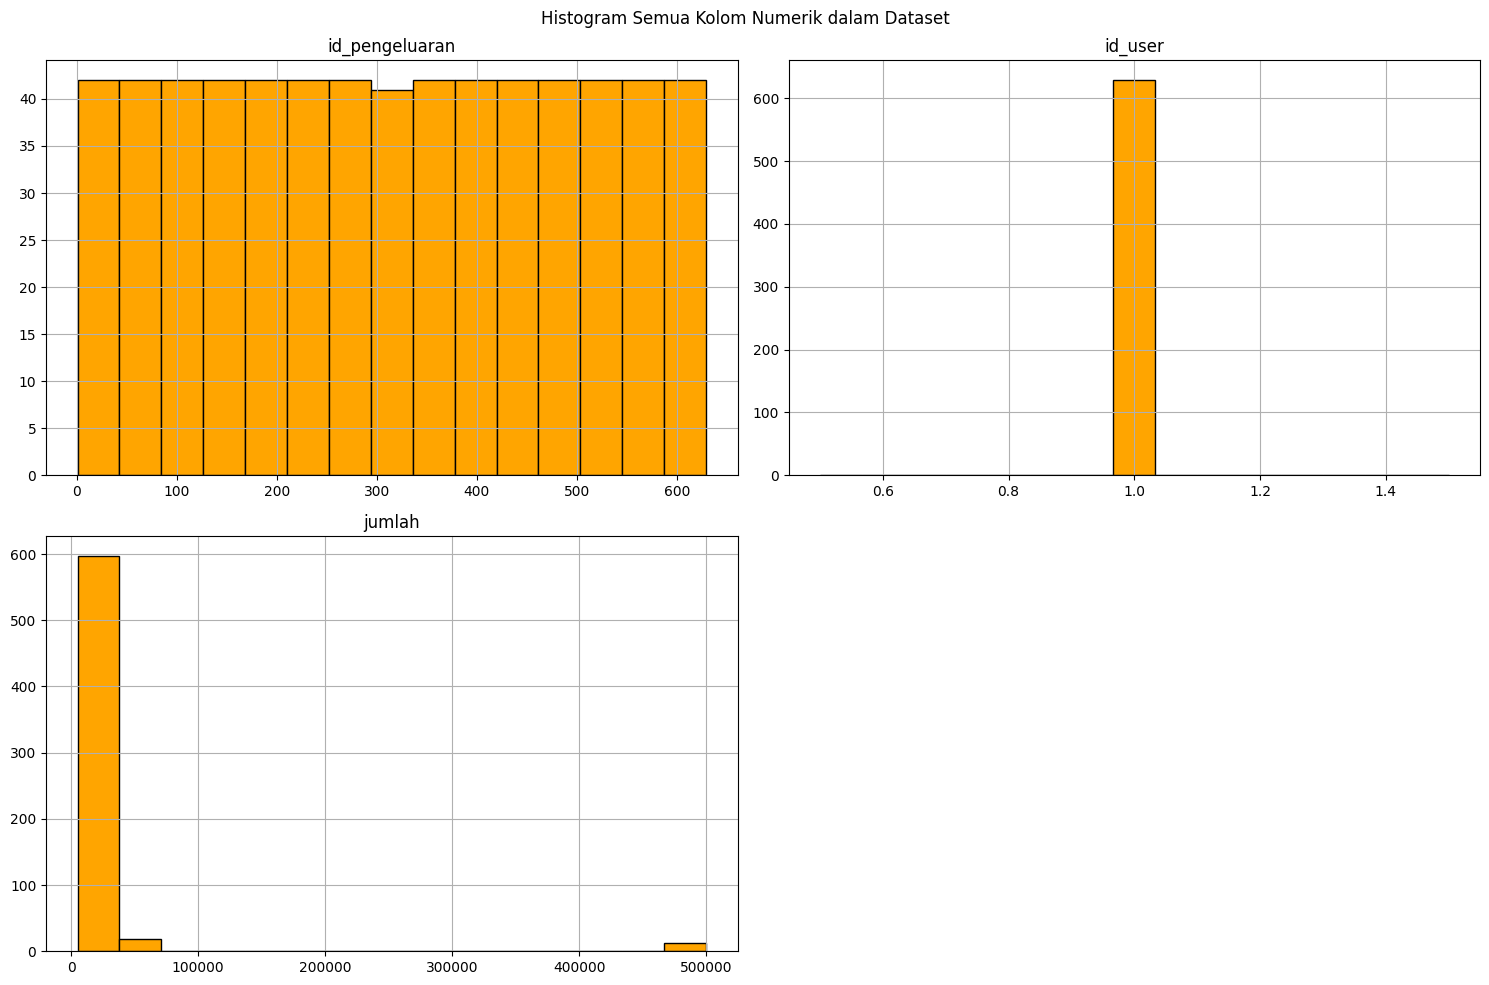

In [44]:
# Membuat histogram untuk semua kolom numerik
df.hist(figsize=(15, 10), bins=15, color='orange', edgecolor='black')
plt.suptitle('Histogram Semua Kolom Numerik dalam Dataset')
plt.tight_layout()
plt.show()

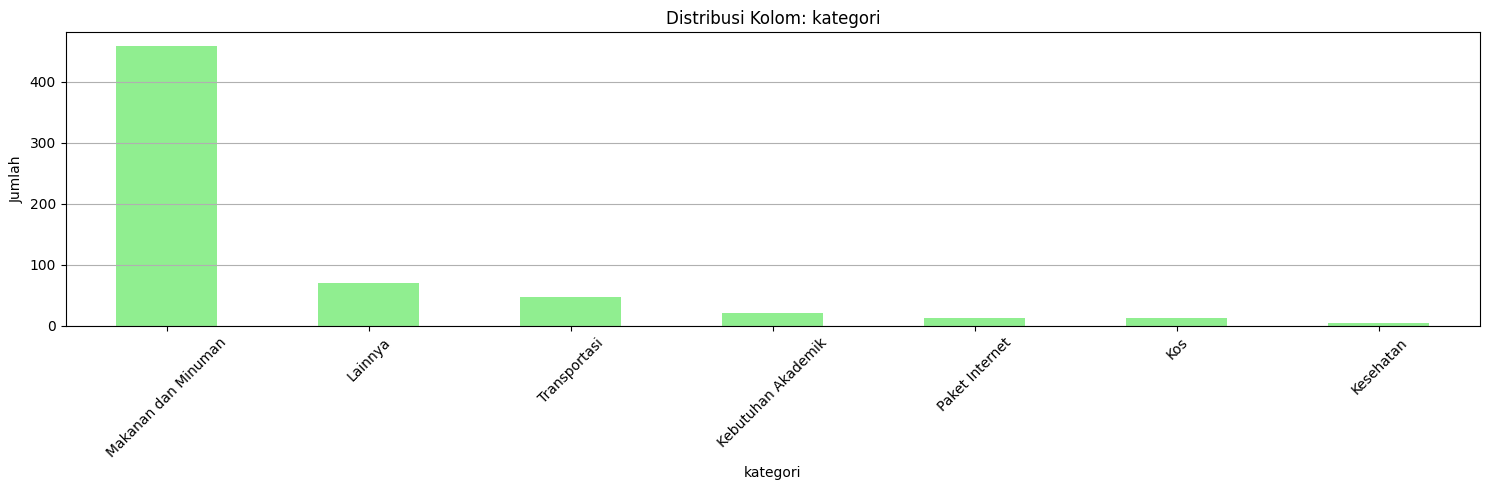

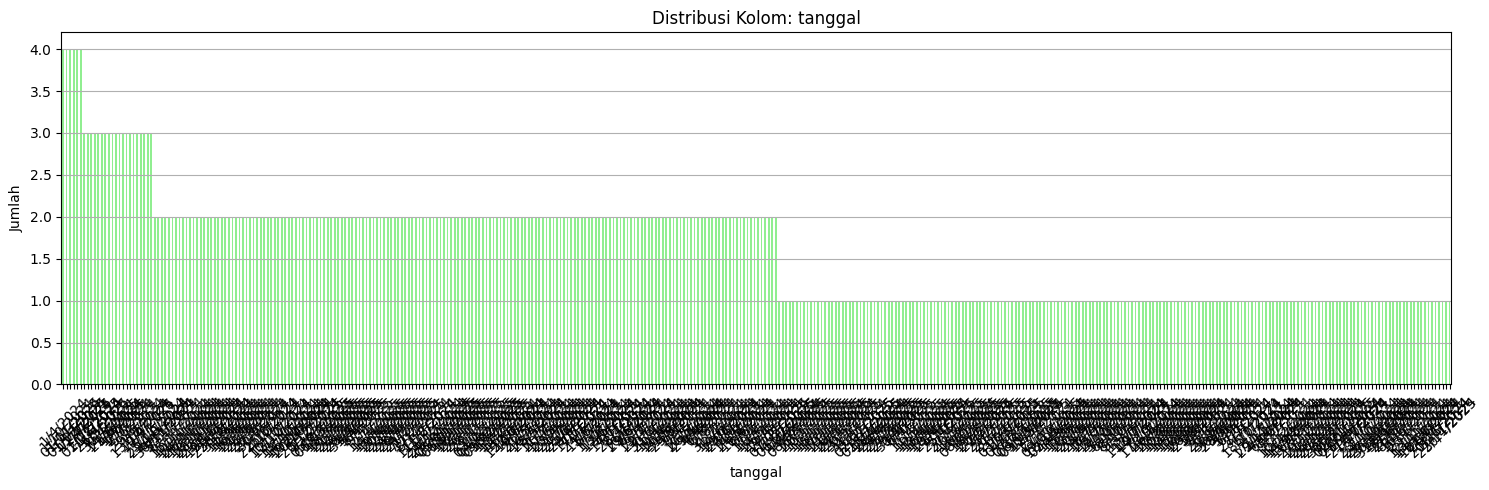

In [45]:
# Loop untuk setiap kolom kategori
for col in df.select_dtypes(include=['object', 'category']).columns:
    plt.figure(figsize=(15, 5))
    df[col].value_counts().plot(kind='bar', color='lightgreen')
    plt.title(f'Distribusi Kolom: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

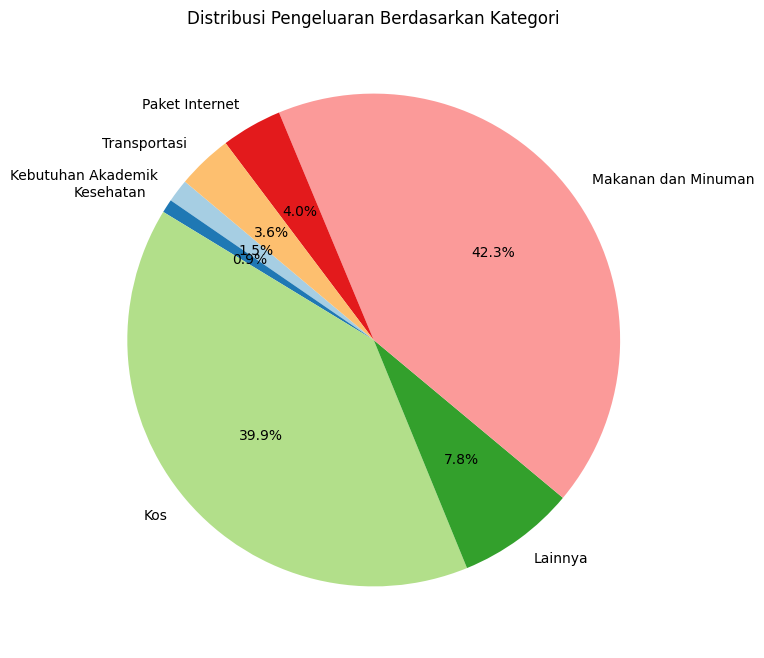

In [46]:
# Menghitung total pengeluaran per kategori
category_sum = df.groupby('kategori')['jumlah'].sum()

# Membuat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(category_sum, labels=category_sum.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
plt.title('Distribusi Pengeluaran Berdasarkan Kategori')
plt.show()

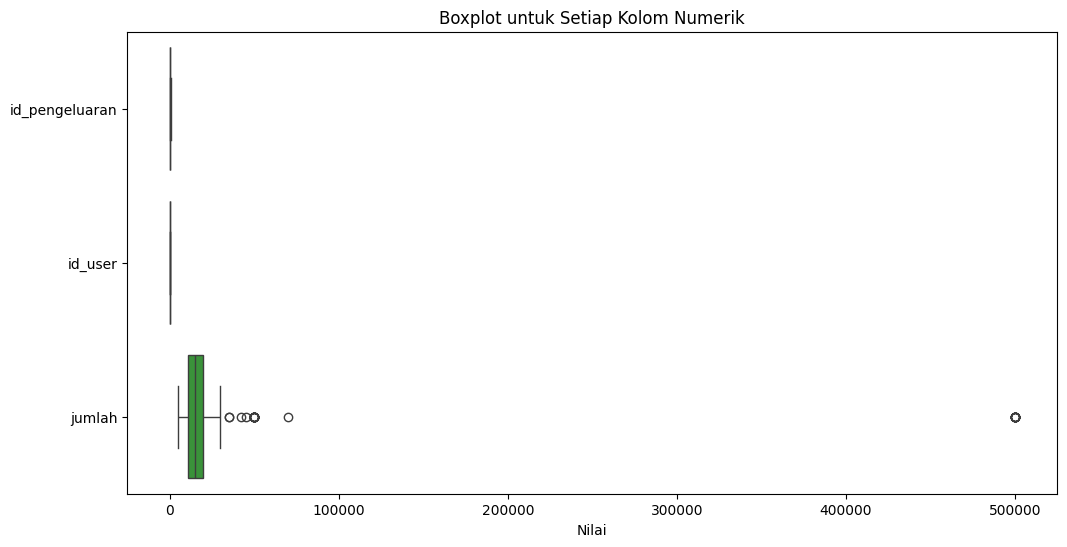

In [47]:
# Buat boxplot untuk kolom numerik
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot untuk Setiap Kolom Numerik')
plt.xlabel('Nilai')
plt.show()

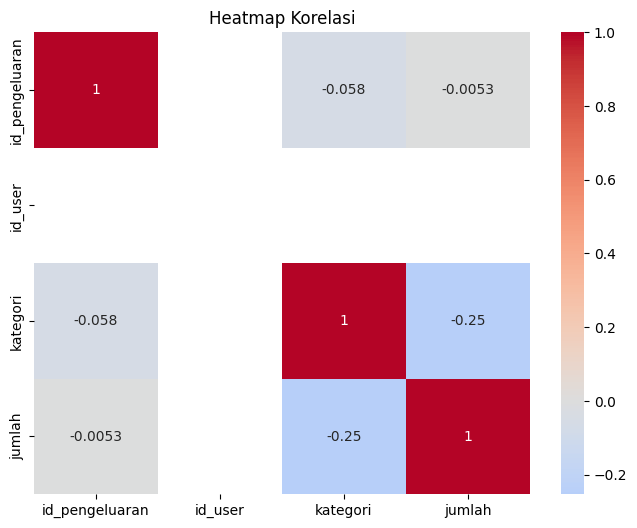

In [48]:
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()

# Label Encoding kolom kategorikal
le = LabelEncoder()
df_copy['kategori'] = le.fit_transform(df_copy['kategori'])

# Pilih semua kolom numerik (setelah encoding kategori)
df_numeric = df_copy.select_dtypes(include='number')

corr_matrix = df_numeric.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Heatmap Korelasi")
plt.show()